In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

# Question 1
#### Using the saved plots and looking at the clean data, do you think there are still outliers in the pCO2 data? Why do you think so?

# Question 2
QC Flag (0-9): 0 = no QC; 1 = good; 2 = probably good!;  use with caution; 3 = probably bad; 4 = bad; 6 = bad down-sampling; 7 = Averaged value; 8 = Interpolated Value; 9 = Missing Value (NaN)

In [4]:
data = pd.read_csv('BaynesSoundMooring_5m_pCO2_20210923T000000Z_20210925T235959Z.csv', header=52, usecols=[0,1,2])

# convert to datetime
data['datetime'] = pd.to_datetime(data['#"Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)"'])

# drop the non-converted datetime axis
data.drop(columns='#"Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)"', inplace=True)

#convert other columns to numeric
data['pCO2'] = pd.to_numeric(data[' "CO2 Partial Pressure (pCO2 uatm)"'], errors = 'coerce')
data['flag'] = pd.to_numeric(data[' "CO2 Partial Pressure QC Flag"  '], errors = 'coerce')

# drop the non-converted axis
data.drop(columns=' "CO2 Partial Pressure (pCO2 uatm)"', inplace=True)
data.drop(columns=' "CO2 Partial Pressure QC Flag"  ', inplace=True)

In [5]:
# 12:30 to 14:30 during 24-Sept-2021 - assuming timezone is UTC
daymin = pd.to_datetime('2021-09-24 12:30:00Z')
daymax = pd.to_datetime('2021-09-24 14:30:00Z')

# trim by selected dates
data = data[(data.datetime >= daymin) & (data.datetime <= daymax)]
data = data.reset_index(drop=True)
data

,datetime,pCO2,flag
0,2021-09-24 12:30:00.675000+00:00,637.725201,1
1,2021-09-24 12:30:01.741000+00:00,637.607007,1
2,2021-09-24 12:30:03.572000+00:00,637.065285,1
3,2021-09-24 12:30:04.651000+00:00,637.291823,1
4,2021-09-24 12:30:05.718000+00:00,637.380469,1
...,...,...,...
6626,2021-09-24 14:29:55.332000+00:00,576.727283,1
6627,2021-09-24 14:29:56.399000+00:00,576.717434,1
6628,2021-09-24 14:29:57.467000+00:00,576.737133,1
6629,2021-09-24 14:29:58.533000+00:00,576.855327,1


Text(0, 0.5, 'CO2 Partial Pressure (pCO2 uatm)')

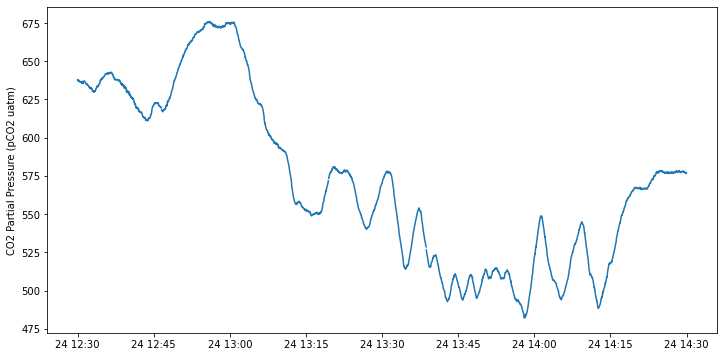

In [10]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
ax.plot(data['datetime'],data['pCO2'])
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_ylabel('CO2 Partial Pressure (pCO2 uatm)')